In [2]:
import matplotlib.pyplot as plt 

In [75]:
#Use case 
def mem_calc(na,nb,nc):
    n_max = max(na,nb,nc)
    int = 8
    frac = 8
    
    norm = 7 * na * (int + frac)    
    w_sum_b = 3 * nb * (int + frac) + 4 * na * nb * (int + frac)
    w_sum_c = 3 * nc * (int + frac) + 4 * nb * nc * (int + frac)   
    relu = 1 * nb * (int + frac)
    decode = 4 * nc * (int + frac)
    header = 32 + n_max * (int + frac)

    sa_mem = norm 
    sb_mem = w_sum_b + relu 
    sc_mem = w_sum_c 
    sd_mem = decode
    total = norm + w_sum_b + w_sum_c + relu + decode 
    print(f"PER SWITCH MEM sa:{sa_mem}, sb:{sb_mem}, sc:{sc_mem}, sd:{sd_mem}, ")
    print(f"MEMORY: norm:{norm/8}, w_sum_b:{w_sum_b/8}, w_sum_c:{w_sum_c/8}, relu:{relu/8}, decode:{decode/8}, header:{header/8},  total_bytes:{total/8}")

def op_calc(na,nb,nc):
    n_max = max(na,nb,nc)
    int = 8
    frac = 8
    n_pipes = 2 #ingress and egress
    op_per_stage = 1
    n_stages = 12 
    n_mcasts = 1

    
    norm = 10 * na     
    w_sum_b = 2 * nb  + 5 * na * nb 
    w_sum_c = 3 * nc  + 4 * nb * nc    
    relu = 2 * nb 
    decode = 5 * nc 

    sa_op = norm 
    sb_op = w_sum_b + relu
    sc_op = w_sum_c 
    sd_op = decode
    print(f"PER SWITCH OPs sa:{sa_op}, sb:{sb_op}, sc:{sc_op}, sd:{sd_op}, ")

    sa_recirculations = norm /n_pipes /(op_per_stage * n_stages)/n_mcasts
    sb_recirculations = (((w_sum_b + relu)/n_pipes )/(op_per_stage * n_stages))/n_mcasts
    sc_recirculations = w_sum_c /n_pipes /(op_per_stage * n_stages)/n_mcasts
    sd_recirculations = decode /n_pipes /(op_per_stage * n_stages)/n_mcasts

    print(f"PER SWITCH RECIRCULATIONs sa:{sa_recirculations}, sb:{sb_recirculations}, sc:{sc_recirculations}, sd:{sd_recirculations}, ")
    total = norm + w_sum_b + w_sum_c + relu + decode 
    print(f"TOTAL OPs: norm:{norm}, w_sum_b:{w_sum_b}, w_sum_c:{w_sum_c}, relu:{relu}, decode:{decode},  total_ops:{total}")

    return(sa_op, sb_op, sc_op, sd_op, sa_recirculations, sb_recirculations, sc_recirculations, sd_recirculations)




In [76]:
print("app_iden")
mem_calc(27,27,7)
sa_op_1, sb_op_1, sc_op_1, sd_op_1 ,sa_recirculations_1 ,sb_recirculations_1 ,sc_recirculations_1 ,sd_recirculations_1 = op_calc(27,27,7)
print("\nos_detec")
mem_calc(32,32,3)
sa_op_2, sb_op_2, sc_op_2, sd_op_2,sa_recirculations_2 ,sb_recirculations_2 ,sc_recirculations_2 ,sd_recirculations_2 = op_calc(32,32,3)
print("\nnet_ml_malware")
mem_calc(16,32,2)
sa_op_3, sb_op_3, sc_op_3, sd_op_3 ,sa_recirculations_3 ,sb_recirculations_3 ,sc_recirculations_3 ,sd_recirculations_3  = op_calc(16,32,2)
print("\ncountry")
mem_calc(16,32,3)
sa_op_4, sb_op_4, sc_op_4, sd_op_4 ,sa_recirculations_4 ,sb_recirculations,sc_recirculations,sd_recirculations = op_calc(16,32,3)



app_iden
PER SWITCH MEM sa:3024, sb:48384, sc:12432, sd:448, 
MEMORY: norm:378.0, w_sum_b:5994.0, w_sum_c:1554.0, relu:54.0, decode:56.0, header:58.0,  total_bytes:8036.0
PER SWITCH OPs sa:270, sb:3753, sc:777, sd:35, 
PER SWITCH RECIRCULATIONs sa:11.25, sb:156.375, sc:32.375, sd:1.4583333333333333, 
TOTAL OPs: norm:270, w_sum_b:3699, w_sum_c:777, relu:54, decode:35,  total_ops:4835

os_detec
PER SWITCH MEM sa:3584, sb:67584, sc:6288, sd:192, 
MEMORY: norm:448.0, w_sum_b:8384.0, w_sum_c:786.0, relu:64.0, decode:24.0, header:68.0,  total_bytes:9706.0
PER SWITCH OPs sa:320, sb:5248, sc:393, sd:15, 
PER SWITCH RECIRCULATIONs sa:13.333333333333334, sb:218.66666666666666, sc:16.375, sd:0.625, 
TOTAL OPs: norm:320, w_sum_b:5184, w_sum_c:393, relu:64, decode:15,  total_ops:5976

net_ml_malware
PER SWITCH MEM sa:1792, sb:34816, sc:4192, sd:128, 
MEMORY: norm:224.0, w_sum_b:4288.0, w_sum_c:524.0, relu:64.0, decode:16.0, header:68.0,  total_bytes:5116.0
PER SWITCH OPs sa:160, sb:2688, sc:262, sd

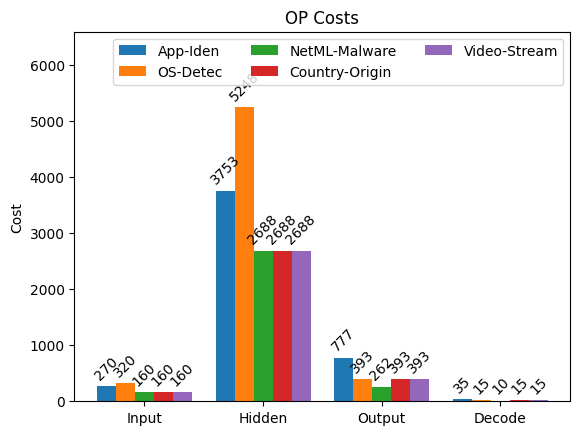

In [77]:
import matplotlib.pyplot as plt
import numpy as np

switches = ("Input", "Hidden", "Output", "Decode")
y_value = { #OPs
    'App-Iden': (sa_op_1, sb_op_1, sc_op_1, sd_op_1),
    'OS-Detec': (sa_op_2, sb_op_2, sc_op_2, sd_op_2),
    'NetML-Malware': (sa_op_3, sb_op_3, sc_op_3, sd_op_3),
    'Country-Origin': (sa_op_4, sb_op_4, sc_op_4, sd_op_4),
    'Video-Stream': (sa_op_4, sb_op_4, sc_op_4, sd_op_4)
}

#plt.subplots_adjust(left=0.183, bottom=0.208, right=0.935, top=0.907, wspace=0.2, hspace=0.2)

x = np.arange(len(switches))  # the label locations
width = 0.16  # the width of the bars
multiplier = -1

fig, ax = plt.subplots() #layout='constrained'

for attribute, measurement in y_value.items():
    offset = width * multiplier 
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3, rotation=45)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cost')
ax.set_title('OP Costs')
ax.set_xticks(x + width, switches)
ax.legend(loc='upper right', ncols=3, bbox_to_anchor=(1, 1))
ax.set_ylim(0, 6600)


plt.show()

app_iden
PER SWITCH MEM sa:3024, sb:48384, sc:12432, sd:448, 
MEMORY: norm:378.0, w_sum_b:5994.0, w_sum_c:1554.0, relu:54.0, decode:56.0, header:58.0,  total_bytes:8036.0
PER SWITCH OPs sa:270, sb:3753, sc:777, sd:35, 
PER SWITCH RECIRCULATIONs sa:11.25, sb:156.375, sc:32.375, sd:1.4583333333333333, 
TOTAL OPs: norm:270, w_sum_b:3699, w_sum_c:777, relu:54, decode:35,  total_ops:4835

os_detec
PER SWITCH MEM sa:3584, sb:67584, sc:6288, sd:192, 
MEMORY: norm:448.0, w_sum_b:8384.0, w_sum_c:786.0, relu:64.0, decode:24.0, header:68.0,  total_bytes:9706.0
PER SWITCH OPs sa:320, sb:5248, sc:393, sd:15, 
PER SWITCH RECIRCULATIONs sa:13.333333333333334, sb:218.66666666666666, sc:16.375, sd:0.625, 
TOTAL OPs: norm:320, w_sum_b:5184, w_sum_c:393, relu:64, decode:15,  total_ops:5976

net_ml_malware
PER SWITCH MEM sa:1792, sb:34816, sc:4192, sd:128, 
MEMORY: norm:224.0, w_sum_b:4288.0, w_sum_c:524.0, relu:64.0, decode:16.0, header:68.0,  total_bytes:5116.0
PER SWITCH OPs sa:160, sb:2688, sc:262, sd

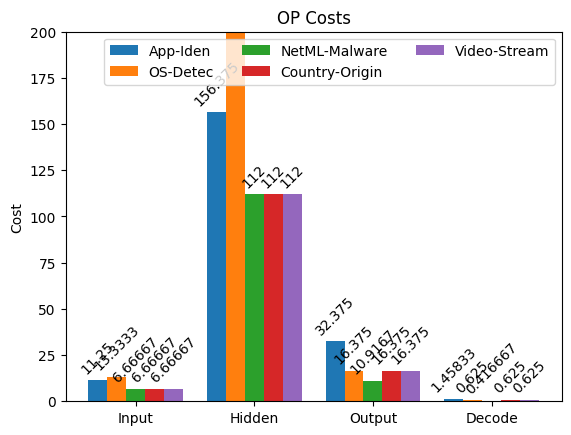

In [80]:
switches = ("Input", "Hidden", "Output", "Decode")
y_value = { #OPs
    'App-Iden': (sa_recirculations_1 ,sb_recirculations_1 ,sc_recirculations_1 ,sd_recirculations_1),
    'OS-Detec': (sa_recirculations_2 ,sb_recirculations_2 ,sc_recirculations_2 ,sd_recirculations_2),
    'NetML-Malware': (sa_recirculations_3 ,sb_recirculations_3 ,sc_recirculations_3 ,sd_recirculations_3),
    'Country-Origin': (sa_recirculations_4 ,sb_recirculations_4 ,sc_recirculations_4 ,sd_recirculations_4),
    'Video-Stream': (sa_recirculations_4 ,sb_recirculations_4 ,sc_recirculations_4 ,sd_recirculations_4)
}

print("app_iden")
mem_calc(27,27,7)
sa_op_1, sb_op_1, sc_op_1, sd_op_1 ,sa_recirculations_1 ,sb_recirculations_1 ,sc_recirculations_1 ,sd_recirculations_1 = op_calc(27,27,7)
print("\nos_detec")
mem_calc(32,32,3)
sa_op_2, sb_op_2, sc_op_2, sd_op_2 ,sa_recirculations_2 ,sb_recirculations_2 ,sc_recirculations_2 ,sd_recirculations_2 = op_calc(32,32,3)
print("\nnet_ml_malware")
mem_calc(16,32,2)
sa_op_3, sb_op_3, sc_op_3, sd_op_3 ,sa_recirculations_3 ,sb_recirculations_3 ,sc_recirculations_3 ,sd_recirculations_3  = op_calc(16,32,2)
print("\ncountry")
mem_calc(16,32,3)
sa_op_4, sb_op_4, sc_op_4, sd_op_4 ,sa_recirculations_4 ,sb_recirculations_4 ,sc_recirculations_4 ,sd_recirculations_4  = op_calc(16,32,3)



#plt.subplots_adjust(left=0.183, bottom=0.208, right=0.935, top=0.907, wspace=0.2, hspace=0.2)

x = np.arange(len(switches))  # the label locations
width = 0.16  # the width of the bars
multiplier = -1

fig, ax = plt.subplots() #layout='constrained'

for attribute, measurement in y_value.items():
    offset = width * multiplier 
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3, rotation=45)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cost')
ax.set_title('OP Costs')
ax.set_xticks(x + width, switches)
ax.legend(loc='upper right', ncols=3, bbox_to_anchor=(1, 1))
ax.set_ylim(0,200)


plt.show()